In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('Resources/current_clean.csv')
df.head()

,YEAR,State,Age_level,Beneficiaries_with_A_and_B,Fee_for_service_beneficiaries,Med_Advantage_Count,Med_Advantage_Rate,Average_Age,%Female,%Male,...,Dialysis_User_Count,Dialysis_User_%,Dialysis_Visits_Per_1000_Users,FQHC_Std_Costs,FQHC_Std_As_%Total,FQHC_Std_Per_Capita,FQHC_Std_Per_User,FQHC_User_Count,FQHC_User_%,FQHC_Visits_Per_1000_Users
0,1/1/2021,WY,All,3573,2971,602,0.1685,70,0.4968,0.5032,...,14,0.0047,222,644752.76,0.0236,217.02,670.92,961,0.3235,1174
1,1/1/2021,WY,All,6444,6186,258,0.0400,71,0.5144,0.4856,...,40,0.0065,741,330449.22,0.0068,53.42,306.26,1079,0.1744,553
2,1/1/2021,WY,All,7463,6861,602,0.0807,73,0.5270,0.4730,...,19,0.0028,437,37418.97,0.0007,5.45,558.49,67,0.0098,39
3,1/1/2021,WY,All,7934,7525,409,0.0516,73,0.5171,0.4829,...,13,0.0017,253,952410.06,0.0144,126.57,471.26,2021,0.2686,818
4,1/1/2021,WY,All,14583,13311,1272,0.0872,71,0.5330,0.4670,...,74,0.0056,665,1257134.97,0.0100,94.44,554.54,2267,0.1703,773


In [2]:
print(df.columns)

Index(['YEAR', 'State', 'Age_level', 'Beneficiaries_with_A_and_B',
       'Fee_for_service_beneficiaries', 'Med_Advantage_Count',
       'Med_Advantage_Rate', 'Average_Age', '%Female', '%Male', '%White',
       '%Black', '%Hispanic', '%OtherRace', '%Dual_Eligible', 'Avg_Risk_Score',
       'Total_Standardized_Costs', 'Total_Std_Risk_Adjusted_Costs',
       'Standardized_Per_Capita_Costs',
       'Standardized_Risk_Adjusted_Per_Capita_Costs', 'IP_Standardized_Costs',
       'IP_Std_%Total', 'IP_Std_Per_Capita', 'IP_Std_Per_User', 'IP_Users',
       '%Beneficiaries_Using_IP', 'IP_Covered_Stays_Per_1000',
       'IP_Covered_Days_Per_1000', 'Hospital_Readmit_Count',
       'Hospital_Readmit_Rate%', 'ER_Visits_Count', 'ER_Visits_Per_1000',
       '%ER_Visits', 'OP_Std_Costs', 'OP_Std_%Total',
       'OP_Std_Per_Capita_Costs', 'OP_Std_Per_User_Costs', 'OP_Users_Count',
       '%_Using_OP', 'OP_Visits_Per_1000', 'SNF_Std_Costs',
       'SNF_Std_As_%Total', 'SNF_Std_Per_Capita', 'SNF_Std_Per_U

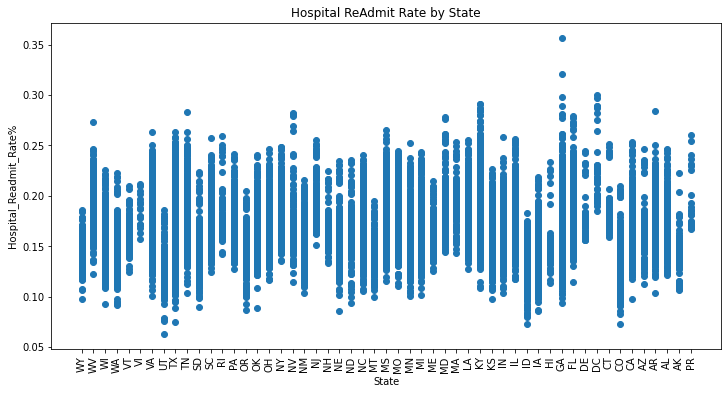

In [3]:
# Plot the "State" column against the "Hospital ReAdmit Rate" column

# Set the figure size
plt.figure(figsize=(12, 6)) 

# Create a scatter plot
plt.scatter(df['State'], df['Hospital_Readmit_Rate%'])  
plt.xlabel('State')
plt.ylabel('Hospital_Readmit_Rate%')
plt.title('Hospital ReAdmit Rate by State')

# Rotate the x-axis labels for better visibility (optional)
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [4]:
# Group the data by 'State' and calculate the mean of 'Hospital_Readmit_Rate%'
state_grouped = df.groupby('State')['Hospital_Readmit_Rate%'].mean()

# Reset the index to convert the grouped data into a DataFrame
state_grouped = state_grouped.reset_index()

# Display the resulting DataFrame
print(state_grouped)

   State  Hospital_Readmit_Rate%
0     AK                0.143776
1     AL                0.172873
2     AR                0.177725
3     AZ                0.161288
4     CA                0.169909
5     CO                0.141762
6     CT                0.185616
7     DC                0.229336
8     DE                0.180896
9     FL                0.188660
10    GA                0.177790
11    HI                0.151095
12    IA                0.148809
13    ID                0.131489
14    IL                0.178595
15    IN                0.167945
16    KS                0.157542
17    KY                0.188526
18    LA                0.183396
19    MA                0.191859
20    MD                0.192011
21    ME                0.164833
22    MI                0.167333
23    MN                0.166002
24    MO                0.175703
25    MS                0.183387
26    MT                0.140813
27    NC                0.175318
28    ND                0.161692
29    NE  

In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

# Select the features (State) and the target variable (Hospital_Readmit_Rate%)
X = df[['State']]
y = df['Hospital_Readmit_Rate%']

# Perform one-hot encoding on the categorical feature 'State'
encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the encoded data
model.fit(X_encoded, y)

# Predict the Hospital_Readmit_Rate% for each state
state_predictions = model.predict(X_encoded)

# Create a DataFrame with the predicted values
predictions = pd.DataFrame({'State': df['State'], 'Hospital_Readmit_Rate%': state_predictions})

# Display the predicted values
print(predictions)

      State  Hospital_Readmit_Rate%
0        WY                0.142076
1        WY                0.142076
2        WY                0.142076
3        WY                0.142076
4        WY                0.142076
...     ...                     ...
23141    WI                0.156413
23142    WI                0.156413
23143    WI                0.156413
23144    WI                0.156413
23145    WI                0.156413

[23146 rows x 2 columns]


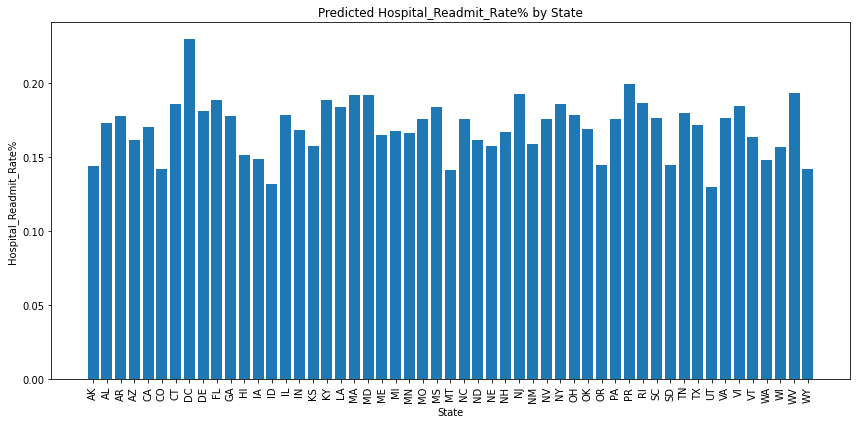

<Figure size 432x288 with 0 Axes>

In [9]:
# Sort the predictions by state for better visualization
predictions.sort_values(by='State', inplace=True)

# Plot the predicted Hospital_Readmit_Rate% by state
plt.figure(figsize=(12, 6))
plt.bar(predictions['State'], predictions['Hospital_Readmit_Rate%'])
plt.xlabel('State')
plt.ylabel('Hospital_Readmit_Rate%')
plt.title('Predicted Hospital_Readmit_Rate% by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.savefig('PredictedReadmitbyState.png')